In [1]:
# import pandas as pd
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
# Đọc dữ liệu
products = pd.read_csv(r'C:\Users\thuong tran\Downloads\ABC Toys Data\products.csv')
sales = pd.read_csv(r'C:\Users\thuong tran\Downloads\ABC Toys Data\sales.csv')
stores = pd.read_csv(r'C:\Users\thuong tran\Downloads\ABC Toys Data\stores.csv')
inventory = pd.read_csv(r'C:\Users\thuong tran\Downloads\ABC Toys Data\inventory.csv')

In [3]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        35 non-null     int64 
 1   Product_Name      35 non-null     object
 2   Product_Category  35 non-null     object
 3   Product_Cost      35 non-null     object
 4   Product_Price     35 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


In [4]:
products.head()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,$9.99,$15.99
1,2,Animal Figures,Toys,$9.99,$12.99
2,3,Barrel O' Slime,Art & Crafts,$1.99,$3.99
3,4,Chutes & Ladders,Games,$9.99,$12.99
4,5,Classic Dominoes,Games,$7.99,$9.99


# 1. XỬ LÝ BẢNG PRODUCT

In [5]:
# chuyển cost sang float 
products["Product_Cost"] = products["Product_Cost"].str.replace("$", "").astype(float)
products["Product_Price"] = products["Product_Price"].str.replace("$", "").astype(float)


In [6]:
products.head()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,9.99,15.99
1,2,Animal Figures,Toys,9.99,12.99
2,3,Barrel O' Slime,Art & Crafts,1.99,3.99
3,4,Chutes & Ladders,Games,9.99,12.99
4,5,Classic Dominoes,Games,7.99,9.99


# 2. XỬ LÝ BẢNG SALES VA BANG STORES

In [7]:
stores.head()

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,4,Maven Toys Saltillo 1,Saltillo,Downtown,2000-01-01
4,5,Maven Toys La Paz 1,La Paz,Downtown,2001-05-31


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Sale_ID     829262 non-null  int64 
 1   Date        829262 non-null  object
 2   Store_ID    829262 non-null  int64 
 3   Product_ID  829262 non-null  int64 
 4   Units       829262 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 31.6+ MB


In [9]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store_ID         50 non-null     int64 
 1   Store_Name       50 non-null     object
 2   Store_City       50 non-null     object
 3   Store_Location   50 non-null     object
 4   Store_Open_Date  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [10]:
sales.head()

,Sale_ID,Date,Store_ID,Product_ID,Units
0,1,2022-01-01,24,4,1
1,2,2022-01-01,28,1,1
2,3,2022-01-01,6,8,1
3,4,2022-01-01,48,7,1
4,5,2022-01-01,44,18,1


In [11]:
#Chuyển các cột ngày sang datetime
sales["Date"] = pd.to_datetime(sales["Date"])
stores["Store_Open_Date"] = pd.to_datetime(stores["Store_Open_Date"])

In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Sale_ID     829262 non-null  int64         
 1   Date        829262 non-null  datetime64[ns]
 2   Store_ID    829262 non-null  int64         
 3   Product_ID  829262 non-null  int64         
 4   Units       829262 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 31.6 MB


In [13]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Store_ID         50 non-null     int64         
 1   Store_Name       50 non-null     object        
 2   Store_City       50 non-null     object        
 3   Store_Location   50 non-null     object        
 4   Store_Open_Date  50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.1+ KB


In [14]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Store_ID       1593 non-null   int64
 1   Product_ID     1593 non-null   int64
 2   Stock_On_Hand  1593 non-null   int64
dtypes: int64(3)
memory usage: 37.5 KB


In [15]:
sales["Sale_ID"].duplicated().sum()


np.int64(0)

In [16]:
inventory.groupby(["Product_ID", "Store_ID"]).size().sort_values(ascending=False).head(10)


Product_ID  Store_ID
1           1           1
            2           1
            3           1
            4           1
            5           1
            6           1
            7           1
            8           1
            9           1
            10          1
dtype: int64

In [17]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Store_ID       1593 non-null   int64
 1   Product_ID     1593 non-null   int64
 2   Stock_On_Hand  1593 non-null   int64
dtypes: int64(3)
memory usage: 37.5 KB


# 3. XUất thành 1 bảng chung 


In [18]:
# # Xuất 4 sheet vào 1 file

# sales.to_csv(r"C:\Users\thuong tran\Downloads\ABC Toys Data\New_Sales.csv", index=False)
# products.to_csv(r"C:\Users\thuong tran\Downloads\ABC Toys Data\New_Products.csv", index=False)
# stores.to_csv(r"C:\Users\thuong tran\Downloads\ABC Toys Data\New_Stores.csv", index=False)
# inventory.to_csv(r"C:\Users\thuong tran\Downloads\ABC Toys Data\New_Inventory.csv", index=False)


In [19]:
df = sales.merge(products, on="Product_ID", how="left", suffixes=("", "_prod")).merge(stores, on="Store_ID",  how="left", suffixes=("", "_store")).merge(inventory, on=["Product_ID","Store_ID"], how="left", suffixes=("", "_inv"))


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sale_ID           829262 non-null  int64         
 1   Date              829262 non-null  datetime64[ns]
 2   Store_ID          829262 non-null  int64         
 3   Product_ID        829262 non-null  int64         
 4   Units             829262 non-null  int64         
 5   Product_Name      829262 non-null  object        
 6   Product_Category  829262 non-null  object        
 7   Product_Cost      829262 non-null  float64       
 8   Product_Price     829262 non-null  float64       
 9   Store_Name        829262 non-null  object        
 10  Store_City        829262 non-null  object        
 11  Store_Location    829262 non-null  object        
 12  Store_Open_Date   829262 non-null  datetime64[ns]
 13  Stock_On_Hand     823030 non-null  float64       
dtypes: d

In [21]:
df.tail()

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Stock_On_Hand
829257,829258,2023-09-30,24,19,1,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,67.0
829258,829259,2023-09-30,16,35,1,Uno Card Game,Games,3.99,7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19,6.0
829259,829260,2023-09-30,22,19,1,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29,17.0
829260,829261,2023-09-30,13,2,2,Animal Figures,Toys,9.99,12.99,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30,2.0
829261,829262,2023-09-30,32,6,1,Colorbuds,Electronics,6.99,14.99,Maven Toys Hermosillo 1,Hermosillo,Residential,2012-08-31,65.0


In [22]:
df

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Stock_On_Hand
0,1,2022-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,1.0
1,2,2022-01-01,28,1,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,6.0
2,3,2022-01-01,6,8,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,50.0
3,4,2022-01-01,48,7,1,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,28.0
4,5,2022-01-01,44,18,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2023-09-30,24,19,1,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,67.0
829258,829259,2023-09-30,16,35,1,Uno Card Game,Games,3.99,7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19,6.0
829259,829260,2023-09-30,22,19,1,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29,17.0
829260,829261,2023-09-30,13,2,2,Animal Figures,Toys,9.99,12.99,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30,2.0


In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
# Đếm số giá trị duy nhất check outlier
numeric_columns = list(df.select_dtypes(['number']).columns)
print(numeric_columns)
# đếm số giá trị numeric duy nhất
for column in numeric_columns:
    print("*, Column: ", column)
    print(len(df[column].unique()), "unique values", "\t & \t",
          df[column].notnull().sum(), "non-null values\t",
          round(100* df[column].notnull().sum()/len(df[column]),2), "% non-null")

['Sale_ID', 'Store_ID', 'Product_ID', 'Units', 'Product_Cost', 'Product_Price', 'Stock_On_Hand']
*, Column:  Sale_ID
829262 unique values 	 & 	 829262 non-null values	 100.0 % non-null
*, Column:  Store_ID
50 unique values 	 & 	 829262 non-null values	 100.0 % non-null
*, Column:  Product_ID
35 unique values 	 & 	 829262 non-null values	 100.0 % non-null
*, Column:  Units
27 unique values 	 & 	 829262 non-null values	 100.0 % non-null
*, Column:  Product_Cost
16 unique values 	 & 	 829262 non-null values	 100.0 % non-null
*, Column:  Product_Price
18 unique values 	 & 	 829262 non-null values	 100.0 % non-null
*, Column:  Stock_On_Hand
94 unique values 	 & 	 823030 non-null values	 99.25 % non-null


In [25]:
df.isnull().sum()

Sale_ID                0
Date                   0
Store_ID               0
Product_ID             0
Units                  0
Product_Name           0
Product_Category       0
Product_Cost           0
Product_Price          0
Store_Name             0
Store_City             0
Store_Location         0
Store_Open_Date        0
Stock_On_Hand       6232
dtype: int64

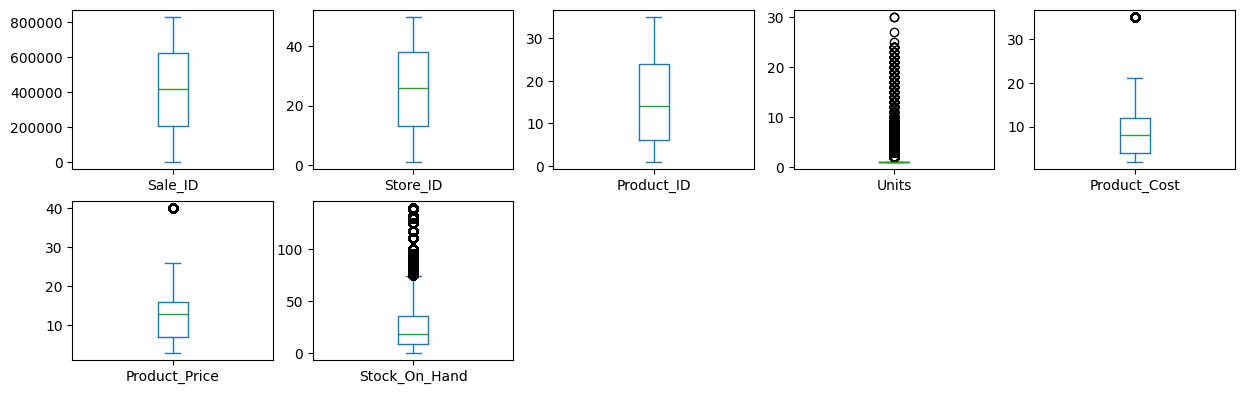

In [26]:
df[numeric_columns].plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 12), sharex=False, sharey=False)
plt.show()

<b> Xử lý dữ liệu cột Stock_On_Hand


In [27]:
# Xoá dữ liệu khoảng >6000 dòng trên tổng hơn 820k dữ liệu
df= df.dropna(subset = 'Stock_On_Hand')

In [28]:
df.isnull().sum()

Sale_ID             0
Date                0
Store_ID            0
Product_ID          0
Units               0
Product_Name        0
Product_Category    0
Product_Cost        0
Product_Price       0
Store_Name          0
Store_City          0
Store_Location      0
Store_Open_Date     0
Stock_On_Hand       0
dtype: int64

<b> Xử lý dữ liệu cột Units


In [29]:
df.describe(include = 'number')


,Sale_ID,Store_ID,Product_ID,Units,Product_Cost,Product_Price,Stock_On_Hand
count,823030.000000,823030.000000,823030.000000,823030.000000,823030.000000,823030.000000,823030.000000
mean,414855.482199,25.267391,15.005944,1.316952,10.026130,13.797757,25.319432
std,239754.243075,14.358599,9.902840,0.833016,7.824972,8.690296,22.955019
min,1.000000,1.000000,1.000000,1.000000,1.990000,2.990000,0.000000
25%,206841.250000,13.000000,6.000000,1.000000,3.990000,6.990000,9.000000
50%,415225.500000,26.000000,14.000000,1.000000,7.990000,12.990000,18.000000
75%,622638.750000,38.000000,24.000000,1.000000,13.990000,15.990000,35.000000
max,829262.000000,50.000000,35.000000,30.000000,34.990000,39.990000,139.000000


In [30]:
df.describe(include='object')


,Product_Name,Product_Category,Store_Name,Store_City,Store_Location
count,823030,823030,823030,823030,823030
unique,35,5,50,29,4
top,Colorbuds,Toys,Maven Toys Ciudad de Mexico 2,Cuidad de Mexico,Downtown
freq,72988,221161,28497,89969,476521


In [31]:
df['Revenue'] = df['Units'] * df['Product_Price']
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()
df.describe()

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Cost,Product_Price,Store_Open_Date,Stock_On_Hand,Revenue,Month
count,823030.000000,823030,823030.000000,823030.000000,823030.000000,823030.000000,823030.000000,823030,823030.000000,823030.000000,823030
mean,414855.482199,2022-12-11 01:14:08.335540736,25.267391,15.005944,1.316952,10.026130,13.797757,2009-08-21 07:57:07.486239744,25.319432,17.466261,2022-11-26 06:22:56.943246336
min,1.000000,2022-01-01 00:00:00,1.000000,1.000000,1.000000,1.990000,2.990000,1992-09-18 00:00:00,0.000000,2.990000,2022-01-01 00:00:00
25%,206841.250000,2022-07-08 00:00:00,13.000000,6.000000,1.000000,3.990000,6.990000,2006-08-30 00:00:00,9.000000,8.990000,2022-07-01 00:00:00
50%,415225.500000,2022-12-28 00:00:00,26.000000,14.000000,1.000000,7.990000,12.990000,2010-09-15 00:00:00,18.000000,14.990000,2022-12-01 00:00:00
75%,622638.750000,2023-05-14 00:00:00,38.000000,24.000000,1.000000,13.990000,15.990000,2014-03-18 00:00:00,35.000000,19.990000,2023-05-01 00:00:00
max,829262.000000,2023-09-30 00:00:00,50.000000,35.000000,30.000000,34.990000,39.990000,2016-05-18 00:00:00,139.000000,879.780000,2023-09-01 00:00:00
std,239754.243075,NaN,14.358599,9.902840,0.833016,7.824972,8.690296,NaN,22.955019,15.566935,NaN


In [32]:
# đếm số dòng Units trên 10 
count = (df['Units'] > 10).sum()
print(count)


214


Text(0.5, 1.0, 'Biểu đồ thể hiện số lượng bán của sp')

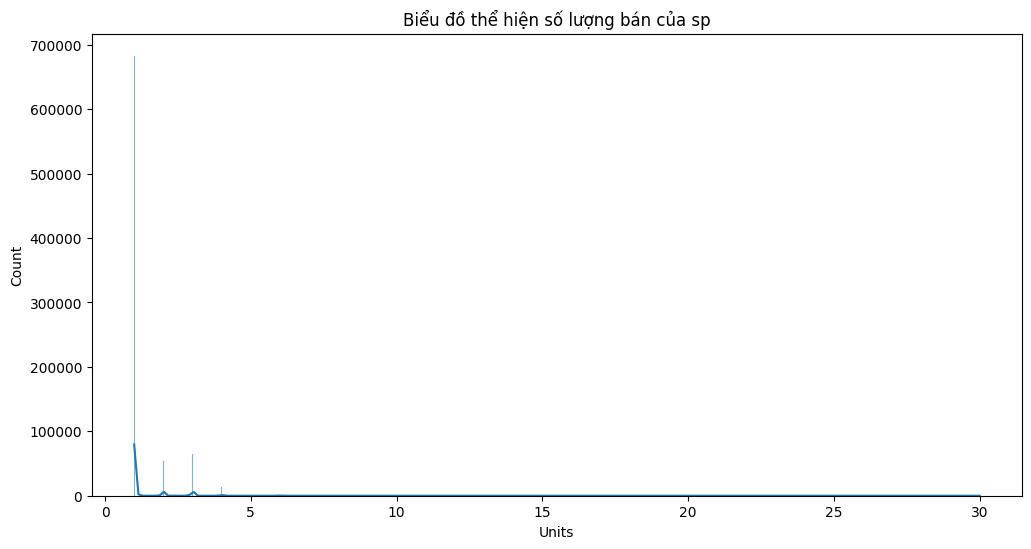

In [33]:
# Xử lý dữ liệu (loại thêm outlier trong Units)
# vẽ biểu đồ KDE của Units để xác định ko lại Units theo IQR 

plt.figure(figsize=(12, 6))
sns.histplot(data =df , x = 'Units', kde=True )
plt.title('Biểu đồ thể hiện số lượng bán của sp')

# -> Số lượng Units = 1 quá nhiều -> loại giá trị trên 10 


In [34]:
# Chọn Xoá Units > 10 thay vì  xoá theo IQR
df = df[(df['Units'] <= 10)] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822816 entries, 0 to 829261
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sale_ID           822816 non-null  int64         
 1   Date              822816 non-null  datetime64[ns]
 2   Store_ID          822816 non-null  int64         
 3   Product_ID        822816 non-null  int64         
 4   Units             822816 non-null  int64         
 5   Product_Name      822816 non-null  object        
 6   Product_Category  822816 non-null  object        
 7   Product_Cost      822816 non-null  float64       
 8   Product_Price     822816 non-null  float64       
 9   Store_Name        822816 non-null  object        
 10  Store_City        822816 non-null  object        
 11  Store_Location    822816 non-null  object        
 12  Store_Open_Date   822816 non-null  datetime64[ns]
 13  Stock_On_Hand     822816 non-null  float64       
 14  Revenue  

In [35]:
# IQR cho Units (Cách này xoá nhiều data quá)
Q1 = df["Units"].quantile(0.25)
Q3 = df["Units"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_iqr_clean = df[(df["Units"] >= lower) & (df["Units"] <= upper)].copy()

print("Ngưỡng IQR:", lower, upper)
print("Số dòng sau khi clean:", len(df_iqr_clean))

Ngưỡng IQR: 1.0 1.0
Số dòng sau khi clean: 683071


In [36]:
df_iqr_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683071 entries, 0 to 829261
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sale_ID           683071 non-null  int64         
 1   Date              683071 non-null  datetime64[ns]
 2   Store_ID          683071 non-null  int64         
 3   Product_ID        683071 non-null  int64         
 4   Units             683071 non-null  int64         
 5   Product_Name      683071 non-null  object        
 6   Product_Category  683071 non-null  object        
 7   Product_Cost      683071 non-null  float64       
 8   Product_Price     683071 non-null  float64       
 9   Store_Name        683071 non-null  object        
 10  Store_City        683071 non-null  object        
 11  Store_Location    683071 non-null  object        
 12  Store_Open_Date   683071 non-null  datetime64[ns]
 13  Stock_On_Hand     683071 non-null  float64       
 14  Revenue  

# 4. TRỰC QUAN HOÁ DỮ LIỆU 

In [37]:
# Cửa hàng doanh thu cao nhất, thấp nhất.
# Hiệu quả theo thành phố / bang / region/ cửa hàng: hiệu quả là lợi nhuận?
# Ảnh hưởng số lượng đối thủ (Competitors) đến doanh thu
#=> Trực quan doanh thu theo thời gian
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822816 entries, 0 to 829261
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sale_ID           822816 non-null  int64         
 1   Date              822816 non-null  datetime64[ns]
 2   Store_ID          822816 non-null  int64         
 3   Product_ID        822816 non-null  int64         
 4   Units             822816 non-null  int64         
 5   Product_Name      822816 non-null  object        
 6   Product_Category  822816 non-null  object        
 7   Product_Cost      822816 non-null  float64       
 8   Product_Price     822816 non-null  float64       
 9   Store_Name        822816 non-null  object        
 10  Store_City        822816 non-null  object        
 11  Store_Location    822816 non-null  object        
 12  Store_Open_Date   822816 non-null  datetime64[ns]
 13  Stock_On_Hand     822816 non-null  float64       
 14  Revenue  

In [38]:
df.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Stock_On_Hand,Revenue,Month
0,1,2022-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,1.0,12.99,2022-01-01
1,2,2022-01-01,28,1,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,6.0,15.99,2022-01-01
2,3,2022-01-01,6,8,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,50.0,6.99,2022-01-01
3,4,2022-01-01,48,7,1,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,28.0,15.99,2022-01-01
4,5,2022-01-01,44,18,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,117.0,39.99,2022-01-01


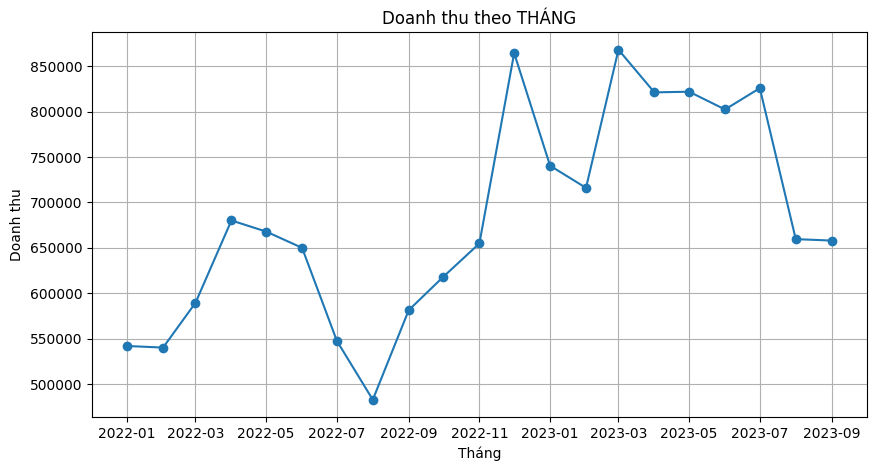

In [39]:
df['Revenue'] = df['Units'] * df['Product_Price']
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Tính tổng doanh thu theo từng ngày/tháng...
rev_by_month = df.groupby('Month')['Revenue'].sum().reset_index()

# vẽ biểu đồ
plt.figure(figsize=(10,5))
plt.plot(rev_by_month['Month'], rev_by_month['Revenue'], marker='o')
plt.title("Doanh thu theo THÁNG")
plt.xlabel("Tháng")
plt.ylabel("Doanh thu")
plt.grid(True)
plt.show()


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822816 entries, 0 to 829261
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sale_ID           822816 non-null  int64         
 1   Date              822816 non-null  datetime64[ns]
 2   Store_ID          822816 non-null  int64         
 3   Product_ID        822816 non-null  int64         
 4   Units             822816 non-null  int64         
 5   Product_Name      822816 non-null  object        
 6   Product_Category  822816 non-null  object        
 7   Product_Cost      822816 non-null  float64       
 8   Product_Price     822816 non-null  float64       
 9   Store_Name        822816 non-null  object        
 10  Store_City        822816 non-null  object        
 11  Store_Location    822816 non-null  object        
 12  Store_Open_Date   822816 non-null  datetime64[ns]
 13  Stock_On_Hand     822816 non-null  float64       
 14  Revenue  

In [41]:
#Không đổi tên file vì trong tableau lấy theo tên gốc, chỉ thay đổi nội dung trong file
#df.to_csv(r'D:\DATA VISUALIZATION\ABC_TOYS\CHECK 25.11\ABC_toy_clean_merge_fillna.csv')

<b> Sau khi them cot moi REV -> thay rev >800usd la bat thuong

 Unit đa số = 1, nhưng có nhiều dòng Units > 30  -> bất thường